# Analysis

Notebook used for analysis of the data on housing and wages in CZ.

In [53]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
# Load data
regions = pd.read_csv("data/processed/regions.csv")
housing = pd.read_csv("data/processed/housing.csv")
wages = pd.read_csv("data/processed/wages.csv")

## Affordability

In [ ]:
# join data to one
all = pd.merge(housing[["year", "region", "name_base", "family_houses", "apartments"]], wages[["year", "name_base", "avg_no_empl_adj", "avg_month_wage_adj"]], how="left", on=["name_base", "year"])

In [52]:
# calculate affordability ratio
all["afford_houses"] = all["family_houses"] / all["avg_month_wage_adj"]
all["afford_apartments"] = all["apartments"] / all["avg_month_wage_adj"]

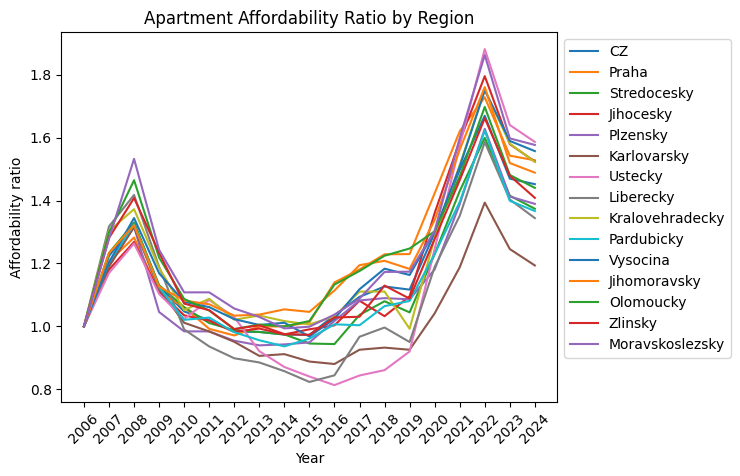

In [81]:
# Display plot of affordibility ratio of apartments per every region
for region in regions["name_base"]:
    region_data = all[all["name_base"] == region]
    plt.plot(region_data["year"], region_data["afford_apartments"], label = region)

plt.xlabel("Year")
plt.ylabel("Affordability ratio")
plt.title("Apartment Affordability Ratio by Region")
plt.xticks(ticks=all["year"].unique(), rotation=45)
plt.legend(bbox_to_anchor=(1,1.0))
plt.show()

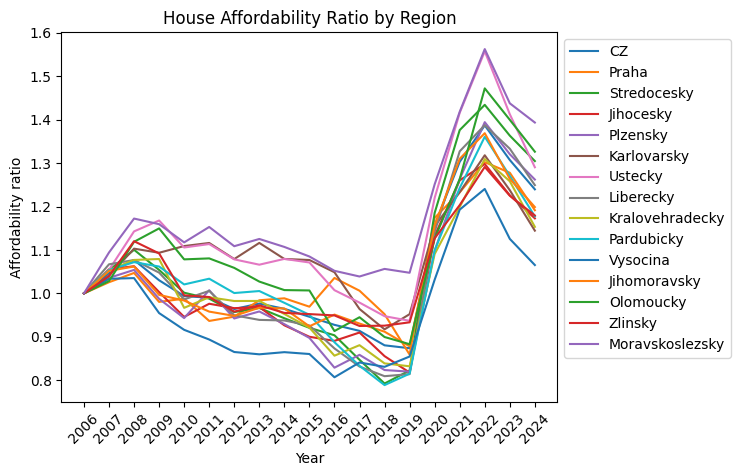

In [80]:
# Display plot of affordibility ratio of houses per every region
for region in regions["name_base"]:
    region_data = all[all["name_base"] == region]
    plt.plot(region_data["year"], region_data["afford_houses"], label = region)

plt.xlabel("Year")
plt.ylabel("Affordability ratio")
plt.title("House Affordability Ratio by Region")
plt.xticks(ticks=all["year"].unique(), rotation=45)
plt.legend(bbox_to_anchor=(1,1.0))
plt.show()

### Descriptive Statistics

In [126]:
# INIT table for descriptive statistics of housing affordability on CZ

stats_house = pd.DataFrame({"name_base" : ["CZ"],
                            "type" : "house",
                            "mean_house" : [np.mean(all[all["name_base"]=="CZ"]["afford_houses"])],
                            "max_house" : [np.max(all[all["name_base"]=="CZ"]["afford_houses"])],
                            "min_house" : [np.min(all[all["name_base"]=="CZ"]["afford_houses"])],
                            "std_house" : [np.std(all[all["name_base"]=="CZ"]["afford_houses"])]
                })

# Complete for regions

for name in regions[1:]["name_base"]:
    stats_house = pd.concat([stats_house, pd.DataFrame([[name, 
                                                         "house",
                                                       np.mean(all[all["name_base"]==name]["afford_houses"]),
                                                       np.max(all[all["name_base"]==name]["afford_houses"]),
                                                       np.min((all[all["name_base"]==name]["afford_houses"])),
                                                       np.std((all[all["name_base"]==name]["afford_houses"]))
                                                       ]],
                                                       columns=stats_house.columns
                                                      )
                            ],
                            ignore_index=True
                           )

In [127]:
# INIT table for descriptive statistics of apartments affordability on CZ

stats_apt = pd.DataFrame({"name_base" : ["CZ"],
                          "type" : "apartment",
                          "mean_house" : [np.mean(all[all["name_base"]=="CZ"]["afford_apartments"])],
                          "max_house" : [np.max(all[all["name_base"]=="CZ"]["afford_apartments"])],
                          "min_house" : [np.min(all[all["name_base"]=="CZ"]["afford_apartments"])],
                          "std_house" : [np.std(all[all["name_base"]=="CZ"]["afford_apartments"])]
                })

# Complete for regions

for name in regions[1:]["name_base"]:
    stats_apt = pd.concat([stats_apt, pd.DataFrame([[name, 
                                                         "apartment",
                                                       np.mean(all[all["name_base"]==name]["afford_apartments"]),
                                                       np.max(all[all["name_base"]==name]["afford_apartments"]),
                                                       np.min((all[all["name_base"]==name]["afford_apartments"])),
                                                       np.std((all[all["name_base"]==name]["afford_apartments"]))
                                                       ]],
                                                       columns=stats_house.columns
                                                      )
                            ],
                            ignore_index=True
                           )

In [132]:
# Union to one table
stats_all = pd.concat([stats_house, stats_apt], ignore_index=True)